In [71]:
import numpy as np
import pandas as pd

#Import Train and Test dataset
train_df = pd.read_csv("balanced_train_set.csv")
test_df = pd.read_csv("balanced_test_set.csv")

one_hot_encoded = pd.get_dummies(train_df['best_strategy'])
train_df = pd.concat([train_df, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(test_df['best_strategy'])
test_df = pd.concat([test_df, one_hot_encoded], axis=1)

#Select Feature ("states", "actions", "uncertainty", "sparse", "tot_tests", "prior", "score") and Target
X = train_df[["states", "actions", "uncertainty", "sparse", "tot_tests", "prior"]]
y = train_df[["dist","flat","freq","hist"]]
X_test = test_df[["states", "actions", "uncertainty", "sparse", "tot_tests", "prior"]]
y_test = test_df[["dist","flat","freq","hist"]]



#[Testing] print Train and Test dataset
#print(train_df)
#print(test_df)


In [72]:
#Decision Tree Model

from sklearn import tree

print(X)

clf = tree.DecisionTreeClassifier()
m1 = clf.fit(X,y.values)




     states  actions  uncertainty  sparse  tot_tests  prior
0        46        9           31       1      38088      1
1        10        7           38       0       1400      0
2        11        9           30       1       2178      1
3        19        6           75       1       4332      1
4        32        5           32       0      10240      1
..      ...      ...          ...     ...        ...    ...
142      20        9           26       0       7200      1
143      22        2           69       1       1936      1
144      23        9           55       0       9522      0
145      47        4           78       0      17672      1
146      16       10           25       1       5120      0

[147 rows x 6 columns]


0.5945945945945946


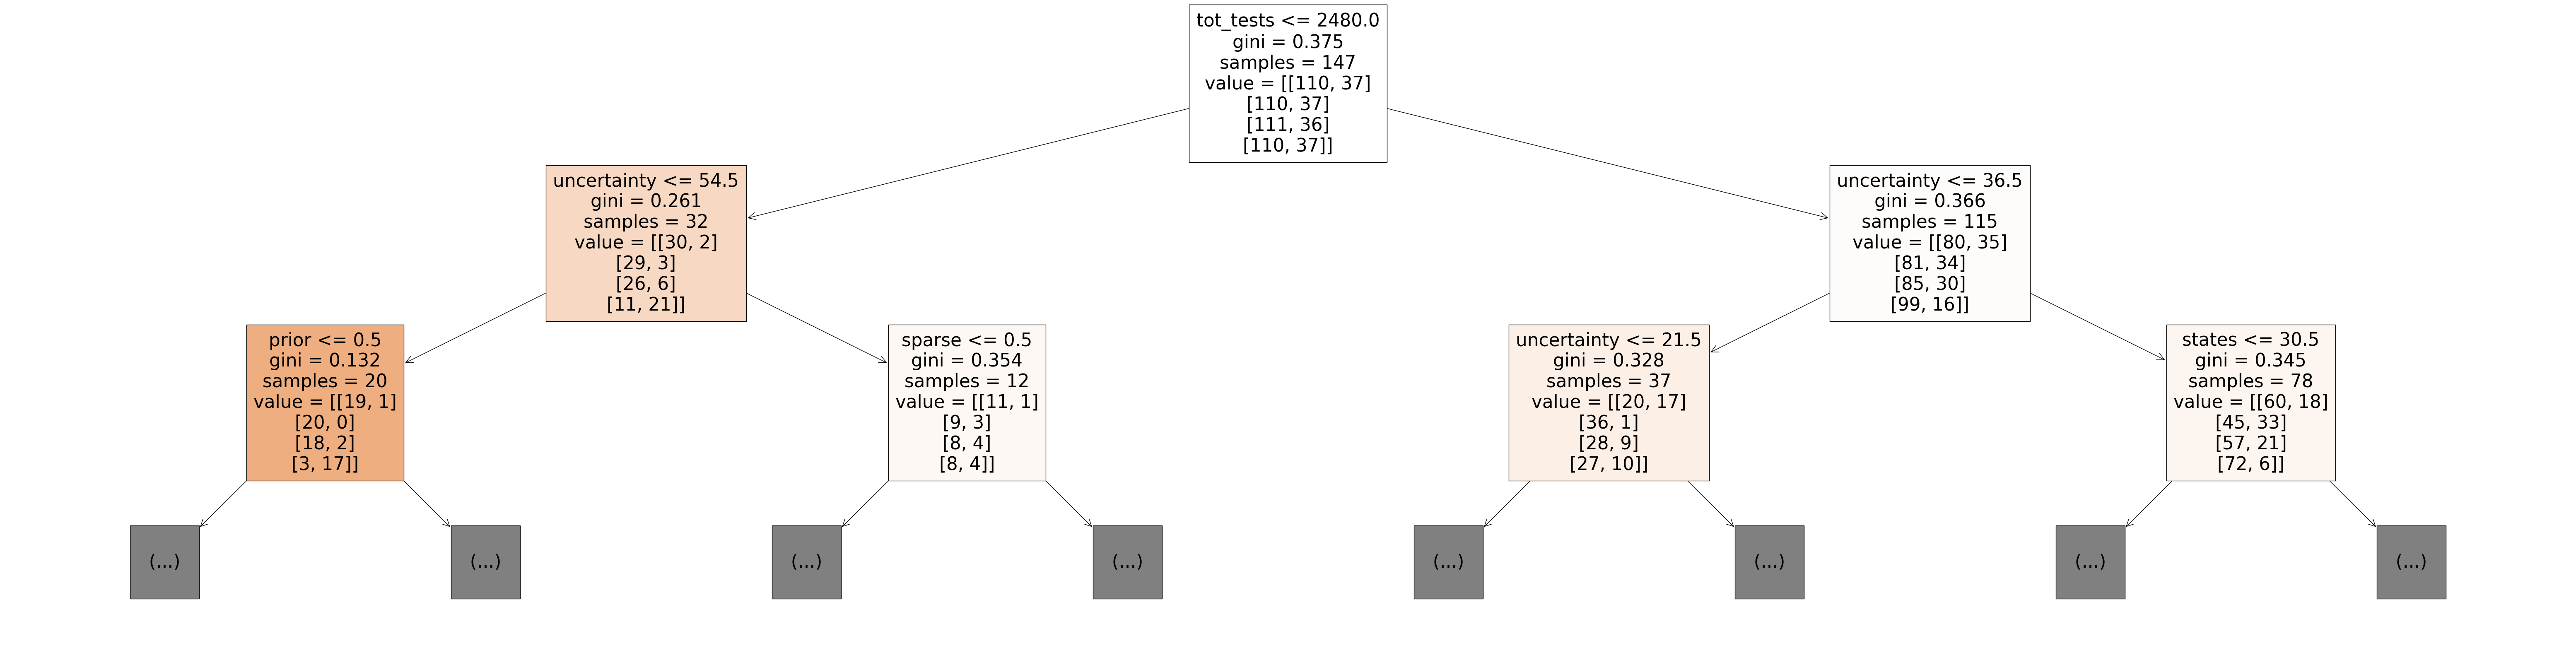

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

y_pred = m1.predict(X_test)
#print(y_pred)
#print("Score: ", m1.score(X_test, y_test))


print(accuracy_score(y_test, y_pred))


plt.figure(figsize =(80,20))

plot_tree(m1, feature_names=X.columns, max_depth=2, filled=True);

